<a href="https://colab.research.google.com/github/Haidarly2/PCVK_Semester_5/blob/main/Pertemuan_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 3 - Operasi Citra Sederhana - Linier Brightness, Contrast,Inverse, Logarithmic Brightness, dan Grayscale Image**

## **Praktikum**

### **1. Import Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2. Import Library**

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### **3. Transformasi Linear Brightness**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


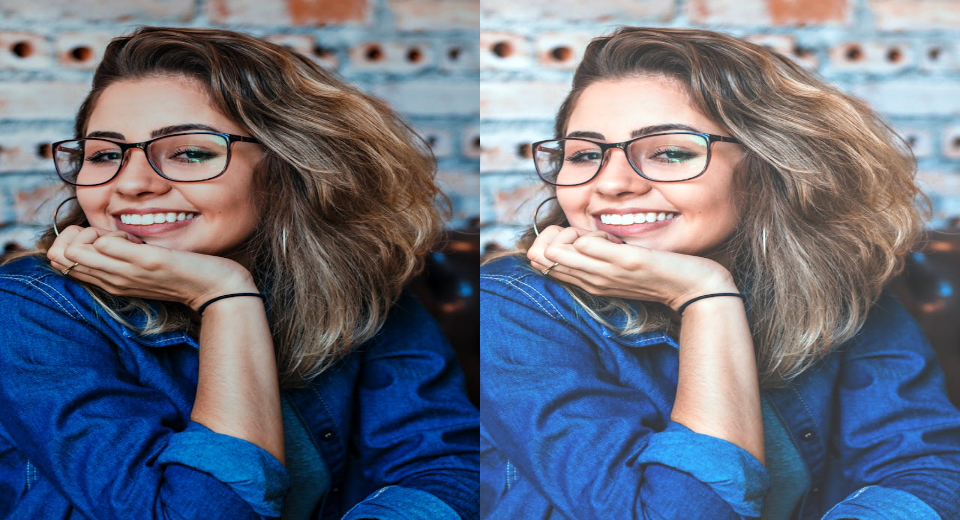

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
# Melakukan resize gambar (misalnya, ubah ukuran menjadi 800x400 piksel)
resized_final_frame = cv.resize(final_frame, (960, 520))

# Menampilkan gambar yang telah di-resize
cv2_imshow(resized_final_frame)

## **Tugas**

### **Tugas 1 - Inverse Gambar**

Invert Without Library

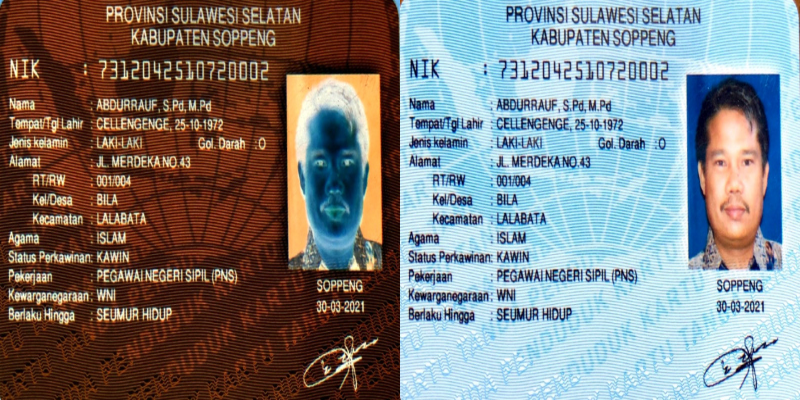

In [ ]:
ktp_ori = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpeg')

# Proses Inverse
inverse = 255 - ktp_ori
inverter =  255 - inverse

#Tampil image
frame = cv.hconcat((inverse,inverter))
resize_frame = cv.resize(frame, (800, 400))
cv2_imshow(resize_frame)

Invert Using CV Library

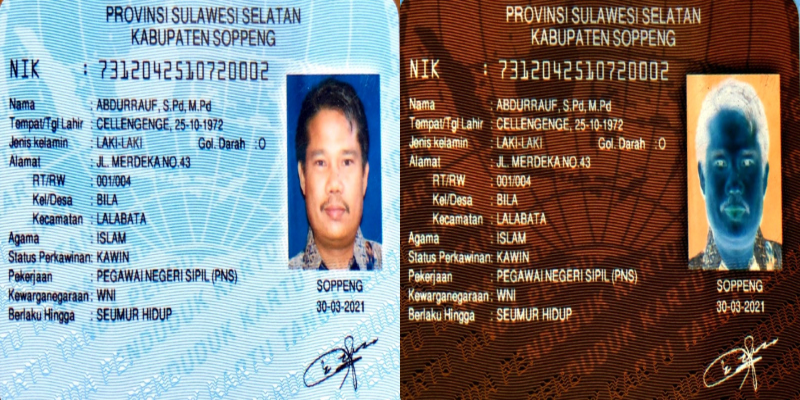

In [ ]:
# Membaca gambar
ktp_ori = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpeg')

# Proses Inverse menggunakan cv.bitwise_not
inverse = cv.bitwise_not(ktp_ori)

# Menampilkan gambar asli dan hasil inversi
frame = cv.hconcat([ktp_ori, inverse])
resize_frame = cv.resize(frame, (800, 400))
cv2_imshow(resize_frame)

Invert Using Numpy Library

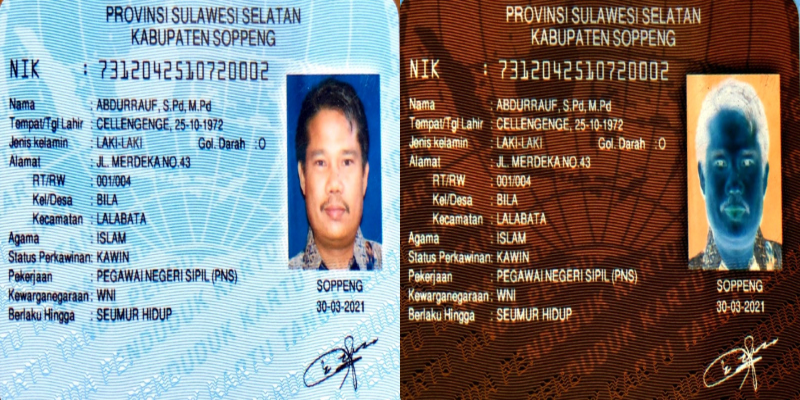

In [ ]:
# Membaca gambar
ktp_ori = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpeg')

# Proses Inverse menggunakan numpy
inverse = np.invert(ktp_ori)

# Menampilkan gambar asli dan hasil inversi
frame = cv.hconcat([ktp_ori, inverse])
resize_frame = cv.resize(frame, (800, 400))

# Tampilkan hasil
cv2_imshow(resize_frame)

Invert OpenCV Transformation

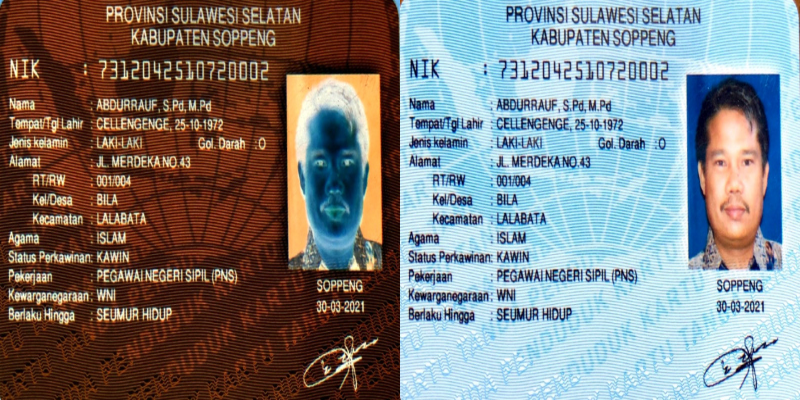

In [ ]:
# Membaca gambar
ktp_ori = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpeg')

# Proses Inverse menggunakan scaling (-1, 1, 255) untuk membalik warna
inverse = cv.convertScaleAbs(ktp_ori, alpha=-1, beta=255)

inverter = cv.convertScaleAbs(inverse, alpha=1, beta=-255)

# Menampilkan gambar asli dan hasil inversi
frame = cv.hconcat([inverse, inverter])
resize_frame = cv.resize(frame, (800, 400))

# Tampilkan hasil
cv2_imshow(resize_frame)

### **Tugas 2 - Transformasi contrast**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50
Masukkan nilai contrast: 2


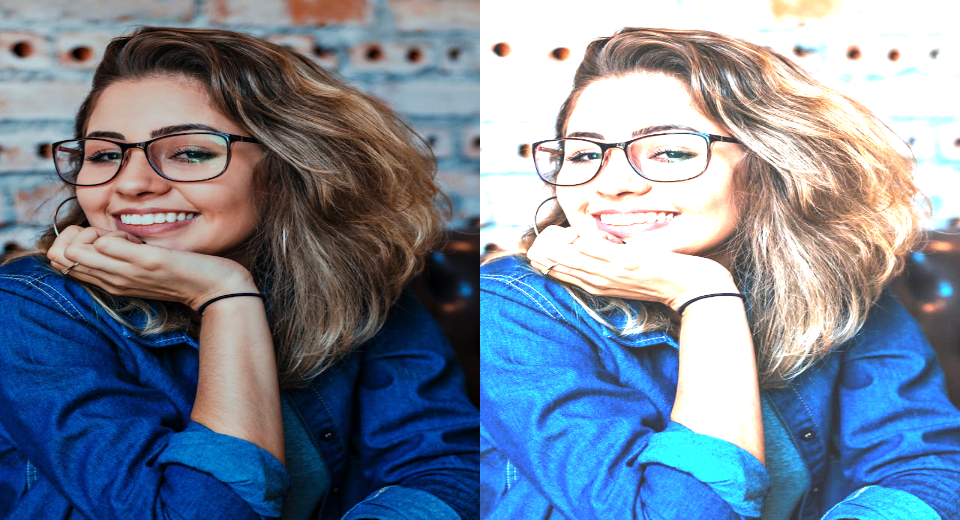

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

try:
  contrast = int(input('Masukkan nilai contrast: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
# Melakukan resize gambar (misalnya, ubah ukuran menjadi 800x400 piksel)
resized_final_frame = cv.resize(final_frame, (960, 520))

# Menampilkan gambar yang telah di-resize
cv2_imshow(resized_final_frame)

### **Tugas 3 - Transformasi Log**

Masukkan nilai brightness (1-100): 50


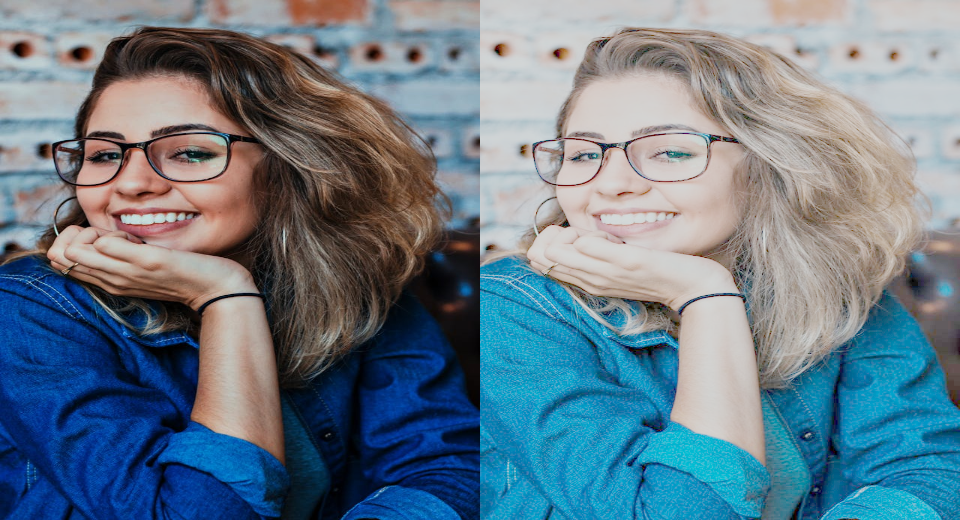

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
original = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.jpg')

# Cek apakah gambar berhasil di-load
if original is None:
    print("Gambar tidak ditemukan. Pastikan path sudah benar.")
    exit()

# Input tingkat brightness dalam rentang 1 hingga 100
try:
    brightness = float(input('Masukkan nilai brightness (1-100): '))
    if brightness < 1 or brightness > 100:
        raise ValueError("Brightness harus berada dalam rentang 1-100.")
except ValueError as e:
    print(f"Error: {e}")
    brightness = 50  # Nilai default jika input salah

# Konversi gambar ke tipe float untuk menghindari masalah overflow
original_float = original.astype(np.float32)

# Konstanta c untuk transformasi logaritmik
c = 255 / np.log(1 + np.max(original_float))

# Penerapan transformasi logaritmik dengan penyesuaian brightness
# Menormalkan brightness input agar berada pada skala 0 hingga 1, lalu dikalikan dengan gambar
brightness_normalized = brightness / 100
log_image = c * np.log1p(original_float * brightness_normalized)

# Normalisasi nilai agar berada di rentang 0 hingga 255 dan konversi ke uint8
log_image = np.clip(log_image, 0, 255).astype(np.uint8)

# Gabungkan gambar asli dan gambar hasil transformasi log
final_frame = cv.hconcat((original, log_image))
# Melakukan resize gambar (misalnya, ubah ukuran menjadi 800x400 piksel)
resized_final_frame = cv.resize(final_frame, (960, 520))

# Menampilkan gambar yang telah di-resize
cv2_imshow(resized_final_frame)

### **Tugas 4 - Tranformasi Grayscale**

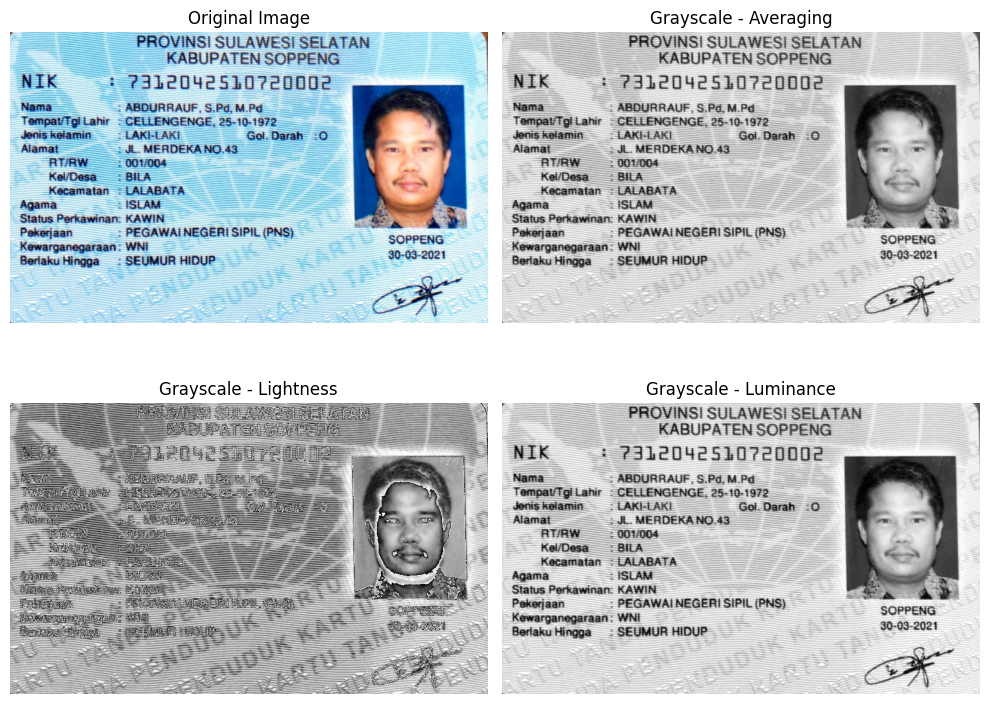

In [6]:
# Load the image
original = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpeg')

# Convert to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Grayscale conversion functions
def grayscale_average(img):
    return np.mean(img, axis=2).astype(np.uint8)

def grayscale_lightness(img):
    return (np.max(img, axis=2) + np.min(img, axis=2)) // 2

def grayscale_luminance(img):
    return (0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2]).astype(np.uint8)

# Apply the different grayscale methods
gray_average = grayscale_average(image_rgb)
gray_lightness = grayscale_lightness(image_rgb)
gray_luminance = grayscale_luminance(image_rgb)

# Plotting the results
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Grayscale (Averaging)
plt.subplot(2, 2, 2)
plt.imshow(gray_average, cmap='gray')
plt.title('Grayscale - Averaging')
plt.axis('off')

# Grayscale (Lightness)
plt.subplot(2, 2, 3)
plt.imshow(gray_lightness, cmap='gray')
plt.title('Grayscale - Lightness')
plt.axis('off')

# Grayscale (Luminance)
plt.subplot(2, 2, 4)
plt.imshow(gray_luminance, cmap='gray')
plt.title('Grayscale - Luminance')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Tugas 5 - Masking certain area**

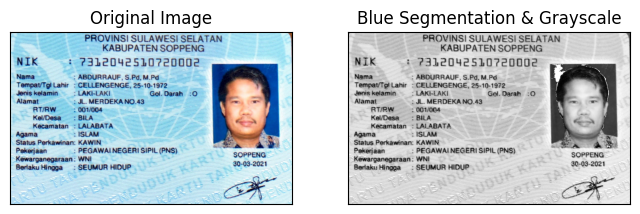

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca gambar KTP
ktp_ori = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpeg')



In [ ]:
# Separate the channels
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
R, G, B = original[:,:,0], original[:,:,1], original[:,:,2]

In [ ]:
grayscale_avg = (R + G + B) / 3

In [ ]:
grayscale_lightness = (np.max(original, axis=2) + np.min(original, axis=2)) / 2

In [ ]:
grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B

In [ ]:
import matplotlib.pyplot as plt

# Display the original and grayscale images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(original)
plt.axis('off')

# Grayscale Average
plt.subplot(2, 2, 2)
plt.title('Grayscale Average')
plt.imshow(grayscale_avg, cmap='gray')
plt.axis('off')

# Grayscale Lightness
plt.subplot(2, 2, 3)
plt.title('Grayscale Lightness')
plt.imshow(grayscale_lightness, cmap='gray')
plt.axis('off')

# Grayscale Luminance
plt.subplot(2, 2, 4)
plt.title('Grayscale Luminance')
plt.imshow(grayscale_luminance, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
cv2_imshow(original)

In [ ]:
# Define color range for color (RGB format)
lower_bound = np.array([0, 100, 200], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask for the blue color range
color_mask = cv2.inRange(original, lower_bound, upper_bound)

# gray image
gray_image = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

image = np.zeros_like(original)
image[color_mask != 0] = original[color_mask != 0]
image[color_mask == 0] = gray_image[color_mask == 0]

cv2_imshow(image)